Поиск фото "Со смыслом"

Мы работаетем в фотохостинге для профессиональных фотографов «Со Смыслом» (“With Sense”).

Пользователи размещают свои фотографии на хостинге и сопровождают их полным описанием: указывают место съёмок, модель камеры и т.д. Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.

Наш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Сервис выводит несколько фотографий с такой же или похожей сценой.

Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Нам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно выбрать лучшую  модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу.
На основе лучшей модели можно будет собрать предварительную версию продукта, которую вы покажете руководителю компании.

Юридические ограничения

В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.

В нашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

    This image is unavailable in your country in compliance with local laws.
    
Однако у нас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.

Описание данных

В файле `train_dataset.csv` собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберем либо одну из них, либо объединим их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Наша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.

Загрузим датасет с сервера.

In [ ]:
!wget -N https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
!unzip -uq dsplus_integrated_project_4.zip
print('-' * 100)
!ls

Установим библиотеки Keras-NLP и Sentence-Transformers.

In [ ]:
!pip install -q torchmetrics
!pip install -q sentence-transformers

Осуществим импорт библиотек.

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import ceil
from pathlib import Path
from tqdm import notebook
import pickle

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from PIL import Image

import torch
import torchvision
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
from transformers import BertTokenizer, BertModel
from torchmetrics import MeanAbsoluteError

from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:

PATH = '/content/to_upload'
TRAIN_IMAGES_PATH = '/content/to_upload/train_images'
TEST_IMAGES_PATH = '/content/to_upload/test_images'
SEED = 51248
BLOCK = ['boy', 'girl', 'child', 'baby', 'kid', 'babe', 'infant', 'teenager', 'teenage', 'teeny', 'children', 'boys', 'girls', 'toddler',
        'juvenile', 'teener', 'young', 'younger', 'youngest', 'youngster', 'stripling', 'schoolchild', 'schoolboy', 'schoolgirl']

np.random.seed(SEED)
torch.manual_seed(SEED)

In [ ]:
def get_vector(image):
    my_embedding = torch.zeros(512)

    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())

    h = layer.register_forward_hook(copy_data)
    with torch.no_grad():
        resnet_model(image.unsqueeze(0).to(device)).float()
    h.remove()
    return my_embedding

In [ ]:
def make_embed(corpus):
    if isinstance(corpus, pd.Series):
        tokenized = corpus.apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

        max_len = 0
        for i in tokenized.values:
            if len(i) > max_len:
                max_len = len(i)

        padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

        attention_mask = np.where(padded != 0, 1, 0)
        batch_size = 128
        embeddings = []
        for i in notebook.tqdm(range(padded.shape[0] // batch_size + 1)):
            batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).to(device)
            attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).to(device)

            with torch.no_grad():
                batch_embeddings = bert_model(batch,
                                              attention_mask=attention_mask_batch)

            embeddings.append(batch_embeddings[0][:,0,:].to('cpu').numpy())
        return embeddings
    elif isinstance(corpus, str):
        tokenized = [tokenizer.encode(corpus, add_special_tokens=True)]
        attention_mask_tensor = torch.LongTensor(np.where(np.array(tokenized) != 0, 1, 0)).to(device)
        tokenized_tensor = torch.LongTensor(tokenized).to(device)
        embed = bert_model(tokenized_tensor, attention_mask=attention_mask_tensor)
        return embed[0][:,0,:].to('cpu').detach().numpy()
    else:
        print('Can\'t tokenize input.')
        return

In [ ]:
lemmatize = nltk.WordNetLemmatizer()

def get_lemmas(text) -> list:

    '''очищаем текст и превращаем в список лемм'''

    text = re.sub('[^a-zA-Z]', ' ', text).lower() # приводим к нижнему регистру.удаляем неалфавитные символы
    text = nltk.word_tokenize(text, language = 'english') # токенизируем
    text = [lemmatize.lemmatize(word) for word in text] # лемматирзируем

    return text

In [ ]:
def get_picture(text) -> None:

    '''Проверяем легальность запроса, получаем наиболее похожие картинки,
    если описание среди оригинальных картинок - добавляем последней верную'''

    if [i for i in get_lemmas(text) if i in BLOCK]: #проверяем не нужно ли вывести на экран заглушку
        print('')
        print('-' * 20, text, '-' * 20)
        print('')
        print('This image is unavailable in your country in compliance with local laws.')
        print('')
    else:
        text_embed = pd.DataFrame(make_embed(text)) #получаем эмбеддинг текста
        df = vectorized_test_images.merge(text_embed,
                                          'cross')
        tensor = torch.FloatTensor(df.drop('image', axis=1).values).to(device)
        df['preds'] = fc_nn(tensor).to('cpu').detach()
        top = list(df.sort_values(by='preds', ascending=False)['image'].head(5)) #получили топ 5 имён файлов с картинками
        top_score = list(df.sort_values(by='preds', ascending=False)['preds'].head(5)) #получили топ 5 оценок

        print('')
        print('-' * 20, text, '-' * 20)
        print('')

        fig = plt.figure(figsize=(15,5)) #выводим на экран 5 наиболее похожих картинок
        plt.rcParams['axes.edgecolor'] = 'black'
        plt.rcParams['axes.linewidth'] = 0
        for i in range(5):
            fig.add_subplot(1, 6, i+1, title=round(top_score[i], 2))
            image = Image.open(Path(PATH, 'test_images', top[i]))
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        if text in list(df_queries['query_text']): #если текст был в исходном файле с описаниями - добавляем оригинальную картинку
            plt.rcParams['axes.edgecolor'] = 'green'
            plt.rcParams['axes.linewidth'] = 5
            fig.add_subplot(1, 6, 6)
            image = Image.open(Path(PATH, 'test_images', df_queries.iloc[df_queries[df_queries['query_text'] == text].index[0]]['image']))
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        plt.show()

    return None

Прочитаем данные из файлов.

In [ ]:
def read_df(path=PATH) -> pd.DataFrame:

    '''читаем датафреймы из указанной директории'''

    df_train = pd.read_csv(Path(path, 'train_dataset.csv'))
    df_crowd = pd.read_csv(Path(path, 'CrowdAnnotations.tsv'), sep='\t',
                           names=['image', 'query_id', 'share_pos', 'count_pos', 'count_neg'])
    df_expert = pd.read_csv(Path(path, 'ExpertAnnotations.tsv'), sep='\t',
                           names=['image', 'query_id', 'first', 'second', 'third'])
    df_queries = pd.read_csv(Path(path, 'test_queries.csv'), index_col=[0], sep='|')
    df_images = pd.read_csv(Path(path, 'test_images.csv'), sep='|')
    df_test = pd.read_csv(Path(path, 'test_queries.csv'), sep='|', index_col=0)

    return df_train, df_crowd, df_expert, df_queries, df_images, df_test

df_train, df_crowd, df_expert, df_queries, df_images, df_test = read_df()

Исследуем данные.

In [ ]:
display(df_train.head(), df_crowd.head(), df_expert.head(), df_queries.head(), df_images.head())

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

image                     query_id  share_pos  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2        1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2        0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2        0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2        0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2        0.0   

   count_pos  count_neg  
0          3          0  
1          0          3  
2          0          3  
3          0          3  
4          0          3

image                     query_id  first  second  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      1       1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      1       1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2      1       1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2      1       2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2      1       1   

   third  
0      1  
1      2  
2      2  
3      2  
4      2

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

image
0  3356748019_2251399314.jpg
1  2887171449_f54a2b9f39.jpg
2  3089107423_81a24eaf18.jpg
3  1429546659_44cb09cbe2.jpg
4  1177994172_10d143cb8d.jpg

Проверим количество уникальных изображений в обучающем и тестовом наборах.

In [ ]:
print('Количество уникальных фото на трейне:', len(df_train['image'].unique()))
print('Количество уникальных фото на тесте:', len(df_queries['image'].unique()))

Количество уникальных фото на трейне: 1000

Количество уникальных фото на тесте: 100


In [ ]:
print('Количество уникальных запросов на тесте:', df_queries.drop_duplicates().shape[0])

Количество уникальных запросов на тесте: 500


Посмотрим на количество оценок в экспертном и краудсорсинговом наборах.

In [ ]:
print('Количество уникальных сочетаний фото-текст оцененных экспертами:', df_expert.drop_duplicates().shape[0])
print('Количество уникальных сочетаний фото-текст оцененных людьми:', df_crowd.drop_duplicates().shape[0])

Количество уникальных сочетаний фото-текст оцененных экспертами: 5822

Количество уникальных сочетаний фото-текст оцененных людьми: 47830


Проверим, все ли текстовые описания в тестовом наборе совпадают с картинками. В столбце `query_id` зашифрована информация о номере картинки к которой дано описание в столбце `query_text`.

In [ ]:
df_queries[df_queries['query_id'].str[:-2] != df_queries['image']].shape[0]

0

Проверим соответствие текстовых описаний друг другу в обучающем и тестовом наборах.

In [ ]:
print('Уникальных текстовых описаний в трейне:', len(set(df_train['query_text'])))
print('Уникальных текстовых описаний в тесте:', len(set(df_queries['query_text'])))
print('Уникальных текстовых описаний которые есть в обоих наборах:', len(set(df_train['query_text']) & set(df_queries['query_text'])))

Уникальных текстовых описаний в трейне: 977

Уникальных текстовых описаний в тесте: 500

Уникальных текстовых описаний которые есть в обоих наборах: 0


Проверим не совпадают ли картинки в обучающем и тестовом наборах.

In [ ]:
print('Уникальных картинок в трейне:', len(set(df_train['image'])))
print('Уникальных картинок в тесте:', len(set(df_queries['image'])))
print('Уникальных картинок которые есть в обоих наборах:', len(set(df_train['image']) & set(df_queries['image'])))

Уникальных картинок в трейне: 1000

Уникальных картинок в тесте: 100

Уникальных картинок которые есть в обоих наборах: 0


Посмотрим на изображения, входящие в датасеты.

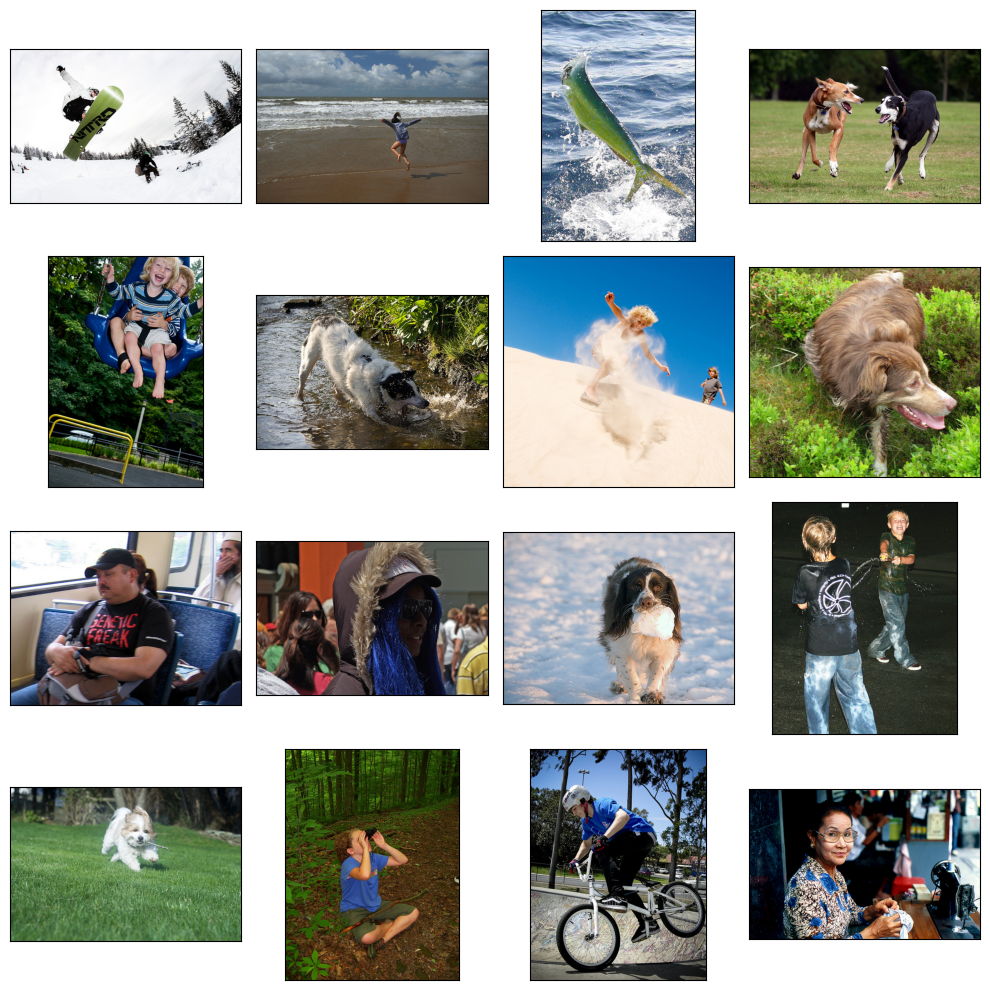

In [ ]:
samples_train = list(df_train['image'].sample(8))
samples_test = list(df_queries['image'].sample(8))

fig = plt.figure(figsize=(10,10))
for i in range(8):
    fig.add_subplot(4, 4, i+1)
    image = Image.open(Path(PATH, 'train_images', samples_train[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
for i in range(8):
    fig.add_subplot(4, 4, i+9)
    image = Image.open(Path(PATH, 'test_images', samples_test[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Выводы

Мы ознакомились с данными.

У нас есть 1000 обучающих картинок и 100 тестовых, предобработанные файлы с сочетаниями описаний и картинок.

Для обучения доступны экспертные оценки соответствия 5822 шт,и оценки выполненные на краудфайдинговой платформе обычными людьми - 47830 шт.

Перейдём к аггрегации оценок для получения тестов.

Аггрегация оценок

Датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.

Напишем функцию для агрегации оценок экспертов,применим к набору данных.

Если оценки разные, то будем усреднять оценку и приводить к диапазону [0,1], если есть одинаковые оценки, то проголосуем большинством.

In [ ]:
def expert_aggregate(row) -> object:

    '''аггрегируем экспертную оценку усреднением ответов и сведением к диапазону [0,1]'''

    if row['first'] != row['second'] != row['third']: #если оценки разные усредняем
        row['expert_score'] = (row['first'] + row['second'] + row['third'] - 3) / 3 / 3

    else: #если есть одинаковые оценки - аггрегируем голосованием
        row['expert_score'] = (max(set([row['first'], row['second'], row['third']]), key = [row['first'], row['second'], row['third']].count) - 1) / 3

    return row

df_expert = df_expert.apply(expert_aggregate, axis=1)

In [ ]:
df_expert

image                     query_id  first  second  \
0     1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      1       1   
1     1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      1       1   
2     1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2      1       1   
3     1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2      1       2   
4     1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2      1       1   
...                         ...                          ...    ...     ...   
5817   997722733_0cb5439472.jpg  2981702521_2459f2c1c4.jpg#2      1       1   
5818   997722733_0cb5439472.jpg  2985679744_75a7102aab.jpg#2      1       1   
5819   997722733_0cb5439472.jpg  3150742439_b8a352e1e0.jpg#2      1       1   
5820   997722733_0cb5439472.jpg  3375070563_3c290a7991.jpg#2      1       1   
5821   997722733_0cb5439472.jpg   486917990_72bd4069af.jpg#2      3       3   

      third  expert_score  
0         1      0.000000  
1         2      0.000000  
2         2      0.000000  
3         2      0.333333  
4         2      0.000000  
...     ...           ...  
5817      1      0.000000  
5818      1      0.000000  
5819      2      0.000000  
5820      1      0.000000  
5821      3      0.666667  

[5822 rows x 6 columns]

По причине того,что только 2329 пар картинка-текст имеют оценки людей и экспертов мы объединим оба блока с помощью `outer`. 

In [ ]:
df_scores = pd.merge(df_expert, df_crowd, how='outer', on=['image', 'query_id'])

def score_aggregate(row) -> object:

    '''аггрегируем оценки людей и экспертов'''

    if np.isnan(row['expert_score']):
        row['score'] = row['share_pos']
    elif np.isnan(row['share_pos']):
        row['score'] = row['expert_score']
    else:
        row['score'] = row['expert_score'] * 0.6 + row['share_pos'] * 0.4

    return row

df_scores = df_scores.apply(score_aggregate, axis=1)

Результат.

In [ ]:
display(df_scores['score'].isna().value_counts())
df_scores['score'].describe()

False    51323
Name: score, dtype: int64

count    51323.000000
mean         0.075049
std          0.207266
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: score, dtype: float64

Добавим результаты в датасеты.

In [ ]:
df_train = pd.merge(df_train, df_scores[['image', 'query_id', 'score']], how='outer', on=['image', 'query_id'])

In [ ]:
to_fill = df_train[df_train['query_text'].notna()]

Заполним пропуски.

In [ ]:
def fill_text(row) -> object:

    '''заполняем пропуски текстов в тренировочном наборе данных'''

    if pd.isnull(row['query_text']):
        texts = to_fill[to_fill['query_id'] == row['query_id']]['query_text']
        if len(texts) > 0:
            row['query_text'] = texts.iloc[0]

    return row

df_train = df_train.apply(fill_text, axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 51323 entries, 0 to 51322

Data columns (total 4 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   image       51323 non-null  object 

 1   query_id    51323 non-null  object 

 2   query_text  50214 non-null  object 

 3   score       51323 non-null  float64

dtypes: float64(1), object(3)

memory usage: 2.0+ MB


После добавления текстов, оказалось что для части `query_id` нет описаний, поэтому их отбросим.

In [ ]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 50214 entries, 0 to 51322

Data columns (total 4 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   image       50214 non-null  object 

 1   query_id    50214 non-null  object 

 2   query_text  50214 non-null  object 

 3   score       50214 non-null  float64

dtypes: float64(1), object(3)

memory usage: 1.9+ MB


### Выводы

Выбран метод, оценки аггрегированы.Перейдём к проверке данных.

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

This image is unavailable in your country in compliance with local laws

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Определить список плохих комментариев
У `query_id`  плохих комментариев отрезать два последних символа и получить список плохих изображений.

In [4]:
mask = (df_train['query_text']
        .apply(lambda query: any(word in query for word in BLOCK)))

pictures_to_delete = df_train[mask]['query_id'].apply(lambda x: x[:-2]).unique()

for image_path in np.random.choice(pictures_to_delete, 5):
    img = mpimg.imread(os.path.join(TRAIN_IMAGES_PATH, image_path))
    imgplot = plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

<class 'NameError'>: name 'df_train' is not defined

In [ ]:
temp = df_train.shape[0]
df_train = df_train[~df_train['image'].isin(pictures_to_delete)]
print(f'Удалено {temp - df_train.shape[0]} изображений')
print('Размер датасета', df_train.shape[0])
df_train.reset_index(inplace=True, drop=True)

Удалено 14496 изображений

Размер датасета 35718


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 35718 entries, 0 to 35717

Data columns (total 4 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   image       35718 non-null  object 

 1   query_id    35718 non-null  object 

 2   query_text  35718 non-null  object 

 3   score       35718 non-null  float64

dtypes: float64(1), object(3)

memory usage: 1.1+ MB


Считаю, что мы верно определили список плохих комментариев. Фото с детьми не попадут внабор данных.

Проверим полученные датасеты.

In [ ]:
display(df_train.head(), df_queries.head())
df_train.info()
print('-' * 100)
df_queries.info()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   
3  3155451946_c0862c70cb.jpg  2549968784_39bfbe44f9.jpg#2   
4  3222041930_f642f49d28.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  score  
0  A young child is wearing blue goggles and sitt...    0.0  
1  A young child is wearing blue goggles and sitt...    0.0  
2  A young child is wearing blue goggles and sitt...    0.0  
3  A young child is wearing blue goggles and sitt...    0.0  
4  A young child is wearing blue goggles and sitt...    0.0

query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 35718 entries, 0 to 35717

Data columns (total 4 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   image       35718 non-null  object 

 1   query_id    35718 non-null  object 

 2   query_text  35718 non-null  object 

 3   score       35718 non-null  float64

dtypes: float64(1), object(3)

memory usage: 1.1+ MB

----------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>

Int64Index: 500 entries, 0 to 499

Data columns (total 3 columns):

 #   Column      Non-Null Count  Dtype 

---  ------      --------------  ----- 

 0   query_id    500 non-null    object

 1   query_text  500 non-null    object

 2   image       500 non-null    object

dtypes: object(3)

memory usage: 15.6+ KB


### Выводы

Данные проверены,все описания содержащие запрещённую информацию убраны. Далее векторизация изображений.

## Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
resnet_model = models.resnet18(weights='DEFAULT').to(device)
layer = resnet_model._modules.get('avgpool')

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, file_names, img_dir, transform=None):
        self.img_labels = file_names
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels[idx])
        image = read_image(img_path)
        if self.transform:
            image = self.transform(image)
        return image

In [ ]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ConvertImageDtype(float),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]).to(device)])
datagen_train = CustomImageDataset(df_train.drop_duplicates('image')['image'].values,
                                   TRAIN_IMAGES_PATH,
                                   transform)

In [ ]:
v = []
for image in notebook.tqdm(iter(datagen_train)):
    v.append(get_vector(image.float()).numpy())

vectorized_train_images = pd.DataFrame(np.vstack(v))
vectorized_train_images['image'] = (df_train
                                    .drop_duplicates('image')
                                    .reset_index(drop=True)['image'])
vectorized_train_images.head()

0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).

  warnings.warn(


0         1         2         3         4         5         6  \
0  0.921291  1.028997  0.872106  1.097257  0.962513  0.888032  0.916789   
1  0.937544  0.957470  0.874587  1.086450  0.952768  0.874088  0.915591   
2  0.905793  1.030638  0.968349  1.032424  0.885392  0.918265  1.002224   
3  0.973712  0.945045  0.901476  1.010976  0.944347  0.835024  0.936327   
4  0.911030  0.953828  0.962666  1.017805  0.906286  0.900900  0.902286   

          7         8         9  ...       503       504       505       506  \
0  1.205058  0.896436  0.904813  ...  0.863427  0.954971  0.882782  1.143017   
1  1.138096  0.914637  0.905774  ...  0.893764  0.901929  0.843597  1.157932   
2  1.136031  0.944939  1.016330  ...  0.857945  0.937402  0.827410  1.160539   
3  1.207380  0.916022  0.998846  ...  0.895467  0.910205  0.883603  1.080503   
4  1.163780  0.953432  0.893578  ...  0.925300  0.897429  0.787852  1.190808   

        507       508       509       510       511                      image  
0  1.007217  0.937188  0.905983  1.016282  0.964012  1056338697_4f7d7ce270.jpg  
1  1.005574  0.955099  0.919930  1.078936  0.964492  1262583859_653f1469a9.jpg  
2  1.013966  1.008168  0.929436  1.072066  0.954072  2621415349_ef1a7e73be.jpg  
3  1.016666  0.926147  0.927904  1.069570  1.054515  3155451946_c0862c70cb.jpg  
4  1.020621  0.932663  0.887840  1.067481  0.953062  3222041930_f642f49d28.jpg  

[5 rows x 513 columns]

In [ ]:
vectorized_train_images.shape

(708, 513)

### Выводы

Получили векторизированные картинки.

## Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- трансформеры (например Bert)
* — если вы изучали трансформеры в спринте Машинное обучение для текстов.

Загрузим трансформер BERT base uncased.

In [ ]:
bert_model = BertModel.from_pretrained('bert-base-uncased',
                                       output_hidden_states=True).to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Преобразуем наши тексты. Запустим получение эмбеддингов.

In [ ]:
vectorized_train_texts = pd.DataFrame(
    np.concatenate(
        make_embed(df_train['query_text']
                   .drop_duplicates()))
)
vectorized_train_texts['query_id'] = (df_train
                                      .drop_duplicates('query_text')
                                      .reset_index(drop=True)['query_id'])
print(vectorized_train_texts.shape)
vectorized_train_texts.head()

  0%|          | 0/8 [00:00<?, ?it/s]

(977, 769)


0         1         2         3         4         5         6  \
0 -0.047878  0.051415 -0.272814 -0.072299  0.047597 -0.743572  0.045497   
1  0.306461  0.187396 -0.317480 -0.147754  0.092267 -0.241826  0.248196   
2  0.225945 -0.147770 -0.410427  0.009857  0.024526 -0.012760 -0.160295   
3  0.363720  0.163009 -0.490553  0.019929  0.072832 -0.125192 -0.251206   
4 -0.368423 -0.235774 -0.305802  0.175350  0.182790 -0.073000  0.053586   

          7         8         9  ...       759       760       761       762  \
0  0.837147 -0.502959 -0.200050  ... -0.110822 -0.342742 -0.105674 -0.026857   
1  0.775116 -0.397221 -0.463749  ...  0.434385 -0.106929  0.084437 -0.069695   
2  1.200928 -0.407790 -0.553016  ... -0.112948 -0.309222 -0.056992  0.130479   
3  0.910354 -0.630080 -0.298645  ...  0.282282 -0.214147  0.347063  0.388013   
4  1.238181 -0.730163 -0.333558  ... -0.355032 -0.142533  0.475379  0.240221   

        763       764       765       766       767  \
0  0.914323  0.184041  0.020953  0.323603  0.604958   
1  0.619138  0.204060 -0.192757  0.181120  0.577595   
2  0.988333 -0.092634 -0.319207  0.430009  0.243055   
3  0.896651  0.471118 -0.301245  0.148654  0.346314   
4 -0.005223 -0.248849 -0.535116  0.498605  0.076596   

                      query_id  
0  2549968784_39bfbe44f9.jpg#2  
1  2718495608_d8533e3ac5.jpg#2  
2  3181701312_70a379ab6e.jpg#2  
3  3207358897_bfa61fa3c6.jpg#2  
4  3286822339_5535af6b93.jpg#2  

[5 rows x 769 columns]

In [ ]:
vectorized_train_texts.shape

(977, 769)

### Выводы

Мы получили векторные представления для описаний текстов с помощью BERT

## 5. Объединение векторов

Подготовим данные для обучения: объединим векторы изображений и векторы текстов с целевой переменной.

In [ ]:
df_scores = df_scores.drop(columns=['first',
                                  'second',
                                  'third',
                                  'expert_score',
                                  'share_pos',
                                  'count_pos',
                                  'count_neg'])

In [ ]:
X = (df_scores
         .merge(vectorized_train_images,
                'left',
                left_on='image',
                right_on='image')
         .merge(vectorized_train_texts,
                'left',
                on='query_id')
         .drop(['query_id'],
               axis=1)
         .dropna()
         .reset_index(drop=True)
        )
print(X.shape)
X.head(20)

(35718, 1282)


image     score       0_x       1_x       2_x  \
0   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
1   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
2   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
3   1056338697_4f7d7ce270.jpg  0.333333  0.921291  1.028997  0.872106   
4   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
5   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
6   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
7   1056338697_4f7d7ce270.jpg  0.000000  0.921291  1.028997  0.872106   
8   1082379191_ec1e53f996.jpg  0.000000  0.965924  0.974910  0.973118   
9   1082379191_ec1e53f996.jpg  0.200000  0.965924  0.974910  0.973118   
10  1082379191_ec1e53f996.jpg  0.000000  0.965924  0.974910  0.973118   
11  1082379191_ec1e53f996.jpg  0.000000  0.965924  0.974910  0.973118   
12  1084040636_97d9633581.jpg  0.000000  0.890183  0.934278  0.900362   
13  1084040636_97d9633581.jpg  0.000000  0.890183  0.934278  0.900362   
14  1084040636_97d9633581.jpg  0.533333  0.890183  0.934278  0.900362   
15  1084040636_97d9633581.jpg  0.333333  0.890183  0.934278  0.900362   
16  1084040636_97d9633581.jpg  0.200000  0.890183  0.934278  0.900362   
17  1084040636_97d9633581.jpg  0.000000  0.890183  0.934278  0.900362   
18  1107246521_d16a476380.jpg  0.000000  0.911789  0.913653  0.976363   
19  1107246521_d16a476380.jpg  0.400000  0.911789  0.913653  0.976363   

         3_x       4_x       5_x       6_x       7_x  ...       758       759  \
0   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.365720 -0.110822   
1   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.326403  0.434385   
2   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.113070 -0.112948   
3   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.033179  0.282282   
4   1.097257  0.962513  0.888032  0.916789  1.205058  ...  0.186066 -0.355032   
5   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.013772  0.019860   
6   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.472322  0.296816   
7   1.097257  0.962513  0.888032  0.916789  1.205058  ... -0.090569 -0.298645   
8   1.117095  0.884587  0.893978  0.940753  1.229563  ...  0.151475  0.120445   
9   1.117095  0.884587  0.893978  0.940753  1.229563  ... -0.017670 -0.393991   
10  1.117095  0.884587  0.893978  0.940753  1.229563  ... -0.375139 -0.599757   
11  1.117095  0.884587  0.893978  0.940753  1.229563  ... -0.133634  0.229038   
12  1.035340  0.966281  0.979440  1.021672  1.133675  ... -0.326314  0.132980   
13  1.035340  0.966281  0.979440  1.021672  1.133675  ... -0.130863  0.224965   
14  1.035340  0.966281  0.979440  1.021672  1.133675  ...  0.388348 -0.084949   
15  1.035340  0.966281  0.979440  1.021672  1.133675  ... -0.456661 -0.172662   
16  1.035340  0.966281  0.979440  1.021672  1.133675  ...  0.055244 -0.256805   
17  1.035340  0.966281  0.979440  1.021672  1.133675  ... -0.306539  0.031253   
18  0.996243  0.826400  0.848143  0.889633  1.293379  ... -0.291887  0.105076   
19  0.996243  0.826400  0.848143  0.889633  1.293379  ... -0.390585  0.010510   

         760       761       762       763       764       765       766  \
0  -0.342742 -0.105674 -0.026857  0.914323  0.184041  0.020953  0.323603   
1  -0.106929  0.084437 -0.069695  0.619138  0.204060 -0.192757  0.181120   
2  -0.309222 -0.056992  0.130479  0.988333 -0.092634 -0.319207  0.430009   
3  -0.214147  0.347063  0.388013  0.896651  0.471118 -0.301245  0.148654   
4  -0.142533  0.475379  0.240221 -0.005223 -0.248849 -0.535116  0.498605   
5  -0.180804  0.155435  0.396362  0.518734 -0.105861  0.140710  0.417575   
6  -0.161767  0.225638 -0.100278  0.357587 -0.006730 -0.073832  0.394214   
7  -0.188570 -0.133327  0.049693  0.756742  0.089407 -0.387838  0.098020   
8  -0.424122 -0.015541  0.089202  0.959848  0.137613 -0.256283  0.244041   
9   0.192833  0.108943  0.20

In [ ]:
y = np.array(df_train['score'])
y.shape

(35718,)

Чтобы на каждом эксперименте с моделями не пересчитывать вектора, сохраним данные для последующей быстрой загрузки.

In [ ]:
with open('X.pickle', 'wb') as f:
    pickle.dump(X, f)

with open('y.pickle', 'wb') as f:
    pickle.dump(y, f)

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки. Для того чтобы учесть изображения при разбиении, можно воспользоваться классом GroupShuffleSplit из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))

train_df, test_df = df.loc[train_indices], df.loc[test_indices]

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [ ]:
gss = GroupShuffleSplit(n_splits=1,
                        train_size=.7,
                        random_state=SEED)
train_indices, test_indices = next(gss.split(X=X.drop(columns=['score']),
                                             y=X['score'],
                                             groups=X['image']))
train_df, test_df = X.loc[train_indices], X.loc[test_indices]
train_df.columns = train_df.columns.astype(str)
test_df.columns = test_df.columns.astype(str)
print(train_df.shape, test_df.shape)

(24978, 1282) (10740, 1282)


Отмасштабируем наши данные.

In [ ]:
train_df = train_df.drop(columns=['image'])
test_df = test_df.drop(columns=['image'])

In [ ]:
X_train = train_df.drop(columns=['score'])
y_train = train_df['score']
X_test = test_df.drop(columns=['score'])
y_test = test_df['score']

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### LinearRegression

В качестве baseline'а попробуем модель линейной регрессии.

Воспользуемся в качестве метрики на RMSE, RMSE будет активнее реагировать на большие выбросы в предсказаниях (т.к. цель и предсказания возводятся в квадрат до вычисления разницы). 

In [ ]:
%%time
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)
score = cross_val_score(
    model, X_train, y_train, groups=df_train['image'].loc[train_indices],
    scoring='neg_root_mean_squared_error',
    cv=GroupShuffleSplit(random_state=SEED)
).mean()
abs(score).round(decimals=3)

CPU times: user 27 s, sys: 3.74 s, total: 30.7 s

Wall time: 21.8 s


1.997

In [ ]:
lr_preds = model.predict(X_test)

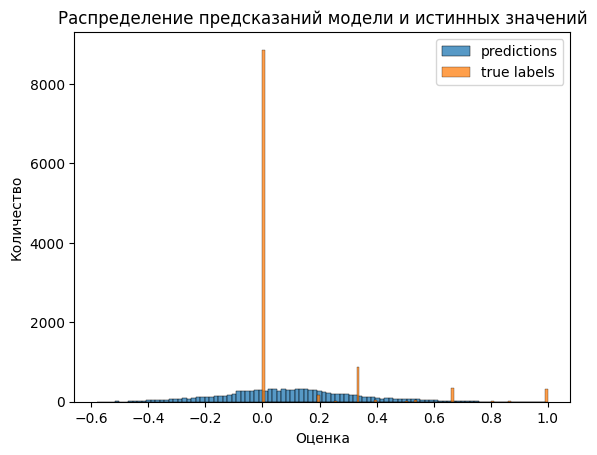

0
count  10740.000000
mean       0.097059
std        0.225926
min       -0.579903
25%       -0.053843
50%        0.091249
75%        0.237740
max        0.994263

In [ ]:
sns.histplot(lr_preds, bins=100, label='predictions')
sns.histplot(test_df['score'], bins=100, label='true labels')
plt.title('Распределение предсказаний модели и истинных значений')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()
display(pd.DataFrame(lr_preds).describe())

Проверим на тесте.

In [ ]:
mean_squared_error(y_test, lr_preds, squared=False).round(decimals=3)

0.299

### LinearSVR

Попробуем модель на основе метода опорных векторов.

Зададим параметры сетки для перебора в GridSearch.

In [ ]:
model = LinearSVR(random_state=SEED)

param_grid = {
    'loss':['squared_epsilon_insensitive'],
    'C':[1]
}

gs_svr = GridSearchCV(
    model,
    param_grid,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=GroupShuffleSplit(n_splits=3, random_state=SEED),
    verbose=1
)

Проведём подбор гиперпараметров.

In [ ]:
%time gs_svr.fit(X_train, y_train, groups=df_train['image'].loc[train_indices])
None

Fitting 3 folds for each of 1 candidates, totalling 3 fits

CPU times: user 1min 41s, sys: 996 ms, total: 1min 42s

Wall time: 5min 7s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(


Посмотрим на результат.

In [ ]:
pd.DataFrame(gs_svr.cv_results_)[['param_C', 'param_loss', 'mean_test_score', 'rank_test_score']].round(decimals=3)

param_C                   param_loss  mean_test_score  rank_test_score
0       1  squared_epsilon_insensitive             -0.3                1

In [ ]:
svr_pred = gs_svr.predict(X_test)

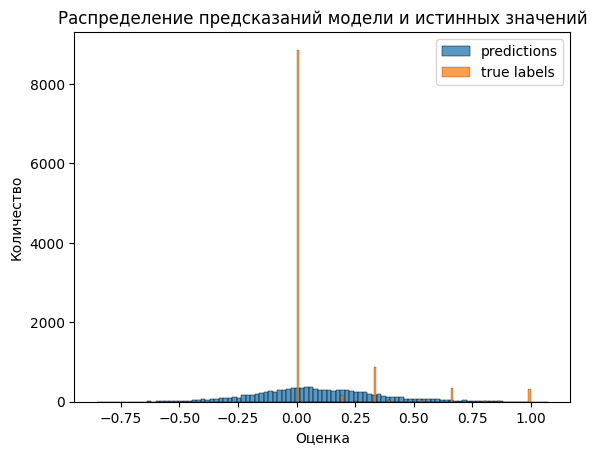

0
count  10740.000000
mean       0.093889
std        0.256004
min       -0.852550
25%       -0.075752
50%        0.079395
75%        0.253781
max        1.073183

In [ ]:
sns.histplot(svr_pred, bins=100, label='predictions')
sns.histplot(test_df['score'], bins=100, label='true labels')
plt.title('Распределение предсказаний модели и истинных значений')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()
display(pd.DataFrame(svr_pred).describe())

Проверим полученную модель на тесте.

In [ ]:
mean_absolute_error(y_test, svr_pred).round(decimals=3)

0.242

### NeuralNetwork

Создадим полносвязную нейронную сеть.

In [ ]:
class Net(nn.Module):
    def __init__(self,
                 n_in_neurons,
                 n_hidden_neurons_1,
                 n_hidden_neurons_2,
                 n_out_neurons=1,
                 p=0):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        nn.init.xavier_normal_(self.fc1.weight)
        self.act1 = nn.LeakyReLU()
        self.dp1 = nn.Dropout(p=p)

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        nn.init.xavier_normal_(self.fc2.weight)
        self.act2 = nn.LeakyReLU()
        self.dp2 = nn.Dropout(p=p)

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        nn.init.xavier_normal_(self.fc3.weight)


    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.dp2(x)
        x = self.act2(x)

        x = self.fc3(x)
        return x

    def fit(self,
            train,
            y_train,
            batch_size=16,
            num_epochs=10,
            lr=0.000001,
            val=None,
            y_val=None,
            plot_scores=True):

        self.train_scores = []
        self.best_train_score = 0
        self.best_train_epoch = 0

        self.val_scores = []
        self.best_val_score = 0
        self.best_val_epoch = 0

        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        loss = nn.MSELoss().to(device)
        mae = MeanAbsoluteError().to(device)

        num_batches = ceil(train.shape[0] / batch_size)
        epoches = []

        for epoch in notebook.tqdm(range(num_epochs)):
            if epoch % 10 == 0:
                print(f'Epoch: {epoch}/{num_epochs}')
                try:
                    print(f'MAE = {score}')
                    print(f'Loss = {loss_value}')
                    print()
                except UnboundLocalError:
                    pass

            self.train()
            order = np.random.permutation(train.shape[0])
            epoches.append(epoch)

            for batch_idx in range(num_batches):
                start_index = batch_idx * batch_size
                batch_indexes = order[start_index:start_index + batch_size]
                X_batch = train[batch_indexes].to(device)
                y_batch = y_train[batch_indexes].to(device)
                optimizer.zero_grad()
                preds = self.forward(X_batch).flatten().to(device)
                loss_value = loss(preds, y_batch)
                loss_value.backward()
                optimizer.step()

            self.eval()

            preds = self.forward(train).flatten().to(device)
            score = float(mae(preds, y_train))
            self.train_scores.append(score)

            if val is not None and y_val is not None:
                preds = self.forward(val).flatten()
                score = float(mae(preds, y_val))
                self.val_scores.append(score)

        self.best_train_score = min(self.train_scores)
        self.best_train_epoch = np.argmin(self.train_scores)

        try:
            self.best_val_score = min(self.val_scores)
            self.best_val_epoch = np.argmin(self.val_scores)
        except:
            pass

        if plot_scores:
            sns.lineplot(x=epoches, y=self.train_scores, label='train')

            print(f'Best train epoch {self.best_train_epoch}')
            print(f'Best train score {self.best_train_score:0.2f}')

            if val is not None and y_val is not None:
                sns.lineplot(x=epoches, y=self.val_scores, label='val')

                print(f'Best val epoch {self.best_val_epoch}')
                print(f'Best val score {self.best_val_score:0.2f}')
            plt.title('Metric by epoch')
            plt.xlabel('Num Epoch')
            plt.ylabel('MAE')
            plt.legend()
            plt.grid()
            plt.show()

  0%|          | 0/250 [00:00<?, ?it/s]

Epoch: 0/250

Epoch: 10/250

MAE = 0.141126811504364

Loss = 0.03036104328930378



Epoch: 20/250

MAE = 0.13579176366329193

Loss = 0.016099190339446068



Epoch: 30/250

MAE = 0.1405375450849533

Loss = 0.030255913734436035



Epoch: 40/250

MAE = 0.13683338463306427

Loss = 0.048769474029541016



Epoch: 50/250

MAE = 0.1367730349302292

Loss = 0.01118115521967411



Epoch: 60/250

MAE = 0.1357085257768631

Loss = 0.013916264288127422



Epoch: 70/250

MAE = 0.13376908004283905

Loss = 0.028634915128350258



Epoch: 80/250

MAE = 0.13405176997184753

Loss = 0.020297305658459663



Epoch: 90/250

MAE = 0.13384416699409485

Loss = 0.05121443793177605



Epoch: 100/250

MAE = 0.13359087705612183

Loss = 0.06827643513679504



Epoch: 110/250

MAE = 0.1323309987783432

Loss = 0.06726988404989243



Epoch: 120/250

MAE = 0.1313556283712387

Loss = 0.050088271498680115



Epoch: 130/250

MAE = 0.13291896879673004

Loss = 0.016503849998116493



Epoch: 140/250

MAE = 0.13245892524719238

Lo

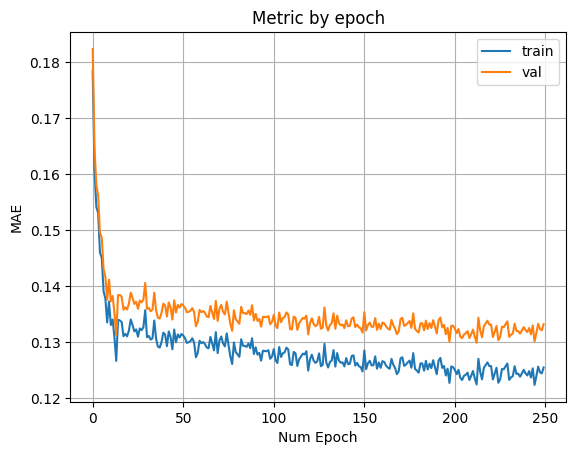

In [ ]:
X_train_tensor = torch.FloatTensor(train_df.drop(columns=['score']).values).to(device)
y_train_tensor = torch.FloatTensor(train_df['score'].values).to(device)

X_val_tensor = torch.FloatTensor(test_df.drop(columns=['score']).values).to(device)
y_val_tensor = torch.FloatTensor(test_df['score'].values).to(device)

fc_nn = Net(X_train_tensor.shape[1], 256, 64, 1, 0.1).to(device)
fc_nn.fit(X_train_tensor,
          y_train_tensor,
          val=X_val_tensor,
          y_val=y_val_tensor,
          num_epochs=250,
          batch_size=32)

0.13317079838834966


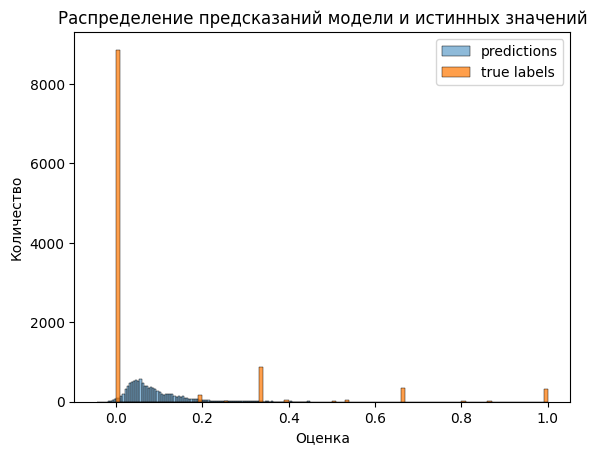

0
count  10740.000000
mean       0.085234
std        0.063106
min       -0.044138
25%        0.042720
50%        0.068591
75%        0.112928
max        0.448055

In [ ]:
nn_preds = fc_nn(X_val_tensor).to('cpu').detach().numpy()

print(mean_absolute_error(test_df['score'], nn_preds))

sns.histplot(nn_preds, bins=100, label='predictions')
sns.histplot(test_df['score'], bins=100, label='true labels')
plt.title('Распределение предсказаний модели и истинных значений')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()
display(pd.DataFrame(nn_preds).describe())

### Выводы

LinearSVR и NN показывают хорошие результаты. Останавливаемся на нейронной сети.

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки test_images, выберите случайные 10 запросов из файла test_queries.csv и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

Создадим загрузчик тестовых изображений.

In [ ]:
datagen_test = CustomImageDataset(df_test.drop_duplicates('image')['image'].values,
                                  TEST_IMAGES_PATH,
                                  transform)

Получим эмбеддинги тестовых картинок.

In [ ]:
v = []
for image in notebook.tqdm(iter(datagen_test)):
    v.append(get_vector(image.float()).numpy())

vectorized_test_images = pd.DataFrame(np.vstack(v))
vectorized_test_images['image'] = (df_test
                                   .drop_duplicates('image')
                                   .reset_index(drop=True)['image'])

print(vectorized_test_images.shape)
vectorized_test_images.head()

0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).

  warnings.warn(


(100, 513)


0         1         2         3         4         5         6  \
0  0.929040  0.914506  0.955516  1.016975  0.925387  0.835022  0.943241   
1  0.952510  0.999923  0.945458  0.998776  0.935560  0.918426  0.907334   
2  0.846960  0.929431  0.907689  0.982305  0.958877  0.958717  0.959393   
3  0.935199  0.952317  0.839976  1.002588  0.898917  0.876105  0.977197   
4  0.862149  0.863461  0.899273  1.001903  0.974522  0.871051  0.952926   

          7         8         9  ...       503       504       505       506  \
0  1.135244  0.980493  0.941937  ...  0.861174  0.879517  0.946653  1.106388   
1  1.159936  0.949715  0.993559  ...  0.951801  0.887627  0.886987  1.146316   
2  1.165353  0.941236  0.944019  ...  0.883448  0.896266  0.857433  1.118529   
3  1.149665  0.862811  0.958575  ...  0.862555  0.835089  0.918351  1.081665   
4  1.211936  0.996726  1.036358  ...  0.853727  0.866590  0.881459  1.058010   

        507       508       509       510       511                      image  
0  1.036786  0.985751  0.921863  1.060068  0.972436  1177994172_10d143cb8d.jpg  
1  1.010126  0.979754  0.874642  1.153621  0.936858  1232148178_4f45cc3284.jpg  
2  1.005187  0.968000  0.896416  1.077742  1.012372   123997871_6a9ca987b1.jpg  
3  0.976703  0.926583  0.892100  1.037400  0.930121  1319634306_816f21677f.jpg  
4  0.987348  0.882415  0.954057  1.022069  1.013742  1429546659_44cb09cbe2.jpg  

[5 rows x 513 columns]

Напишем функцию, принимающую на вход текстовое описание и возвращающую 5 картиной с максимальной предсказанной оценкой схожести.

Теперь выберем 10 случайных запросов из файла с тестовыми запросами и посмотрим на результаты.

In [ ]:
samples = df_queries.sample(10)
text_test = list(samples['query_text'])
text_test

['A group of people in a large yard toss a disc .',
 'a man wearing red socks playing running with some other men',
 'The woman with a henna tattoo holds a piece of paper in her left hand .',
 'Two West Highland Terriers chase a red ball .',
 'Three men on mountain bikes go over a sand hill .',
 'A brown dog and a black and white dog stand beside a hole in the dirt .',
 'Two girls on a jungle gym .',
 'Women wearing red and black are clapping .',
 'Three people stand outside a fast food joint with their drinks .',
 'I child slides into a wading pool full of water while an adult tosses a bucket of water on them .']



-------------------- A group of people in a large yard toss a disc . --------------------




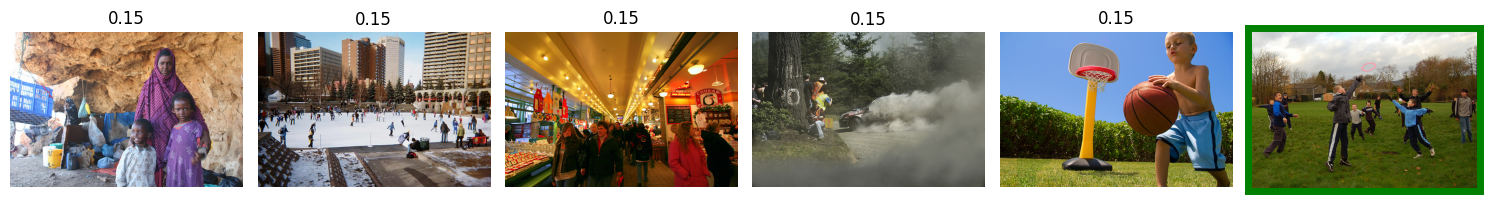



-------------------- a man wearing red socks playing running with some other men --------------------




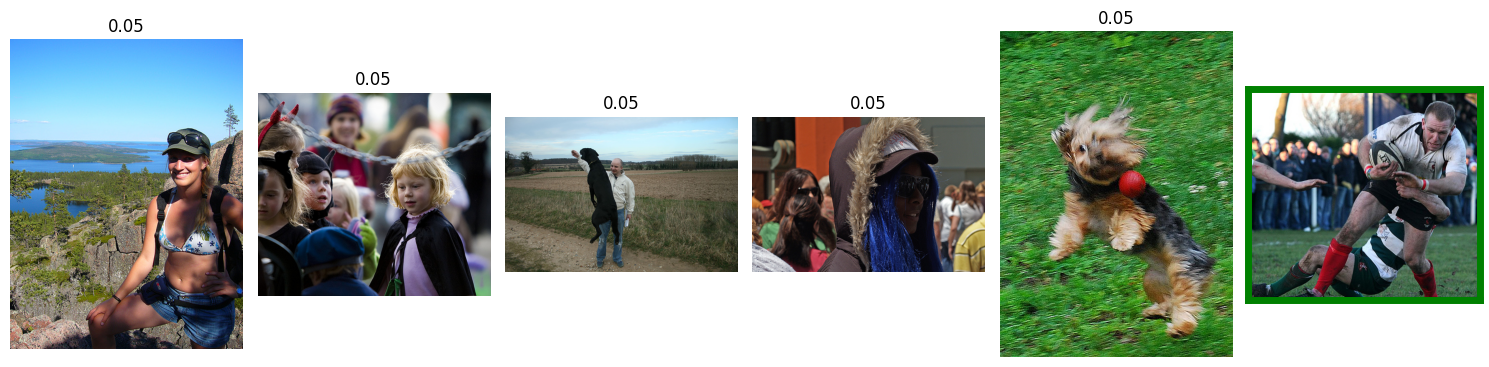



-------------------- The woman with a henna tattoo holds a piece of paper in her left hand . --------------------




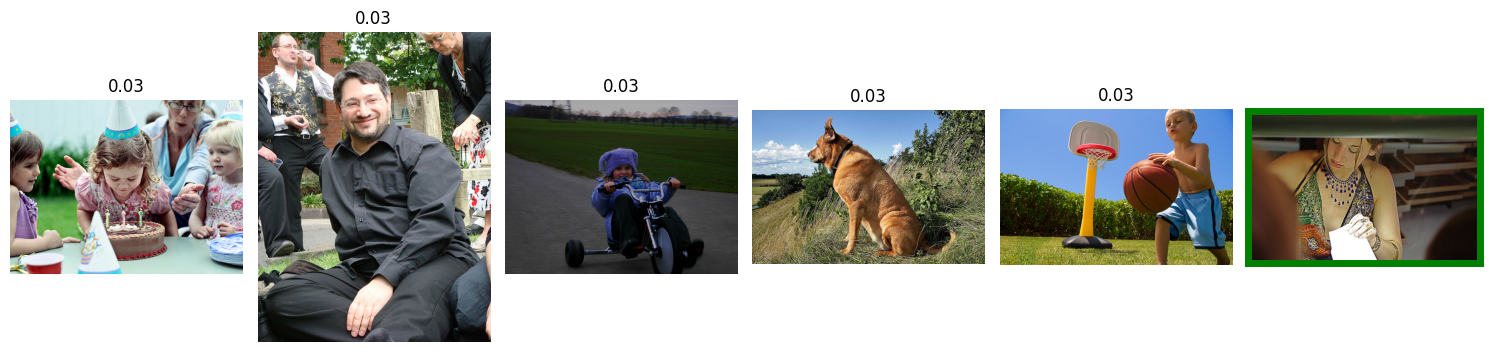



-------------------- Two West Highland Terriers chase a red ball . --------------------




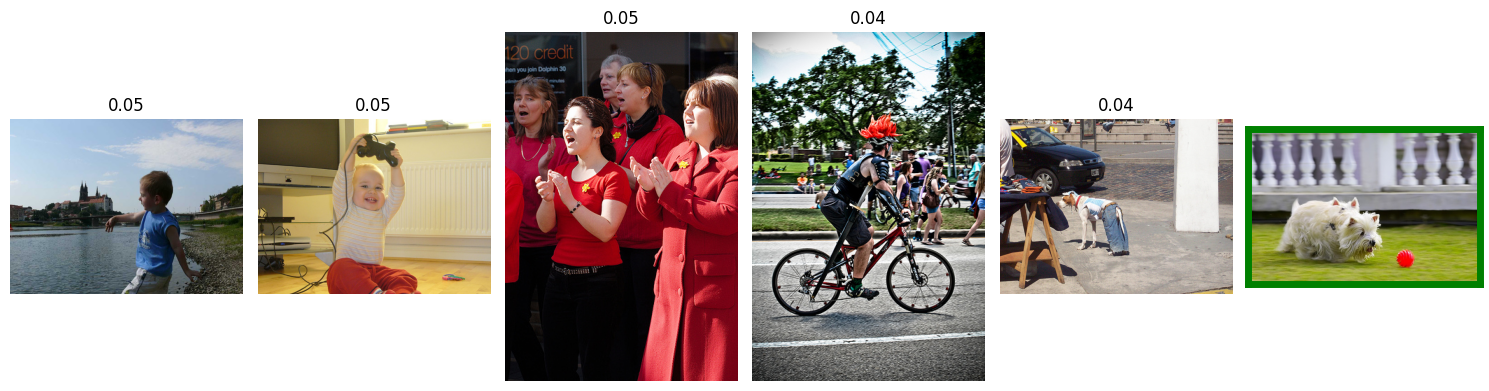



-------------------- Three men on mountain bikes go over a sand hill . --------------------




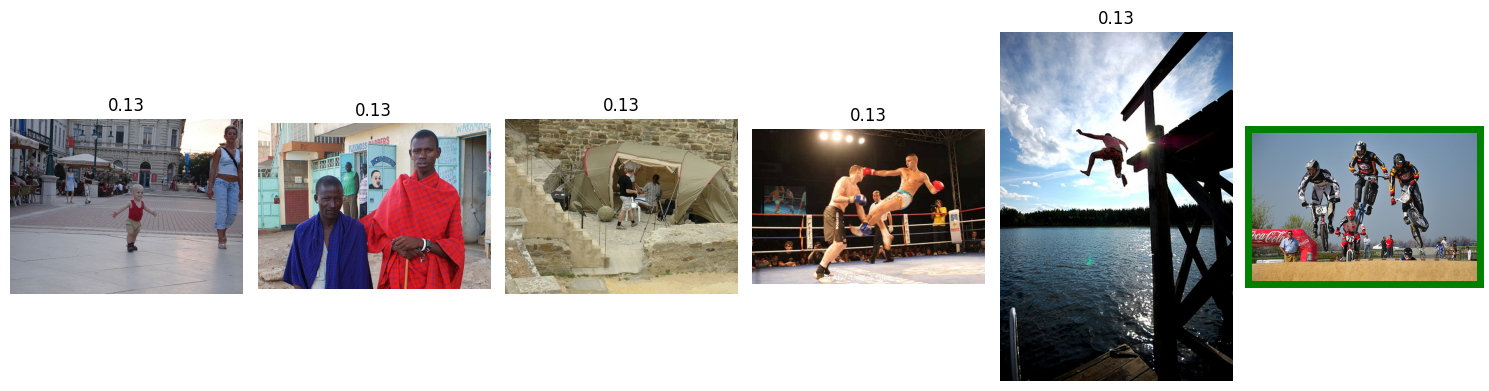



-------------------- A brown dog and a black and white dog stand beside a hole in the dirt . --------------------




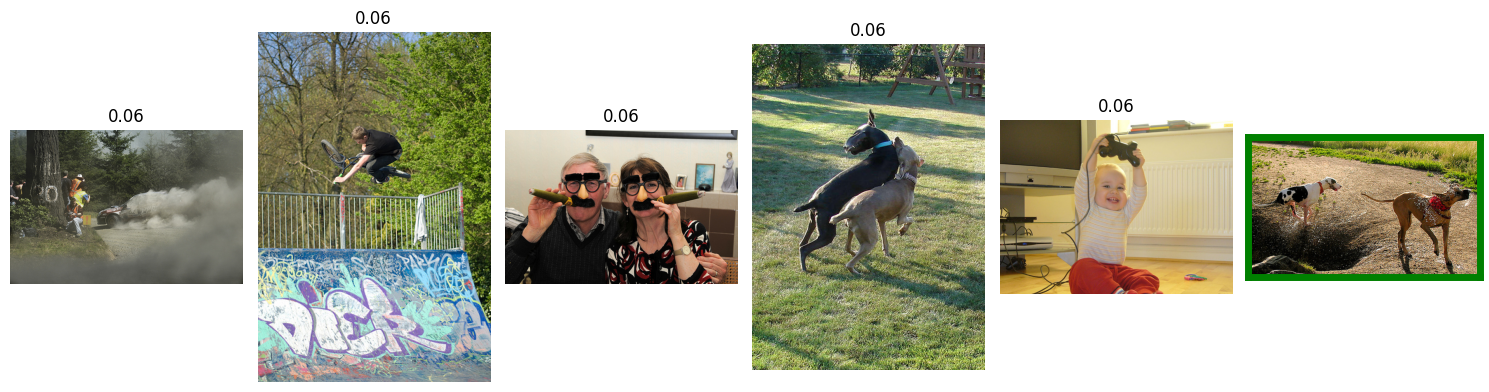



-------------------- Two girls on a jungle gym . --------------------



This image is unavailable in your country in compliance with local laws.





-------------------- Women wearing red and black are clapping . --------------------




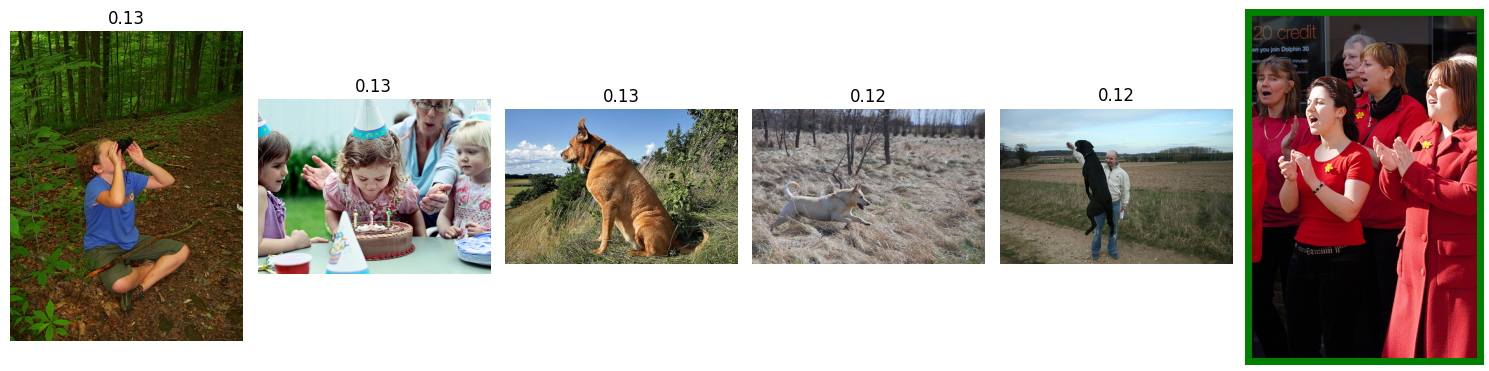



-------------------- Three people stand outside a fast food joint with their drinks . --------------------




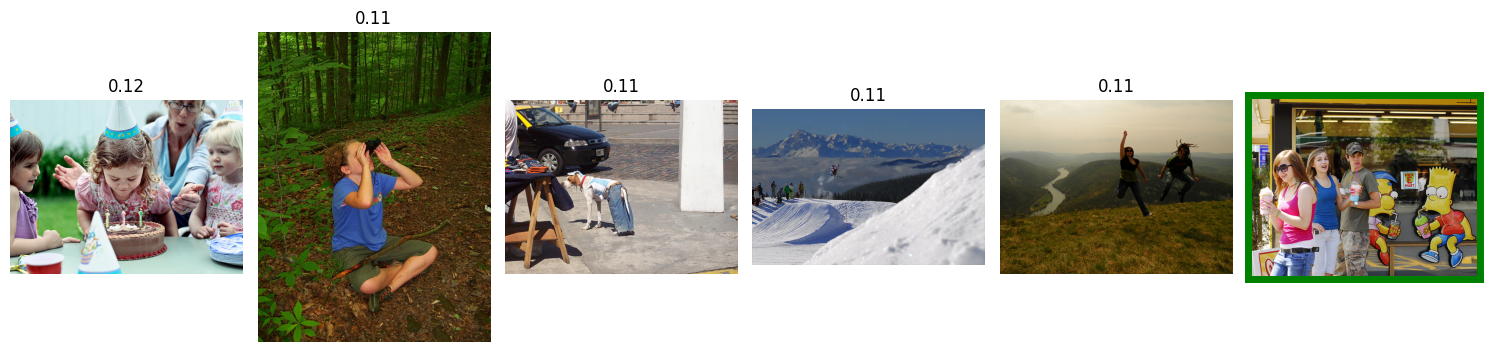



-------------------- I child slides into a wading pool full of water while an adult tosses a bucket of water on them . --------------------



This image is unavailable in your country in compliance with local laws.




In [ ]:
for text in text_test:
    get_picture(text)

## Заключение

В проектной работе выполнен прототип для системы поиска изображений по фотографии.

Мы использовали сеть ResNet18, а для текстовых эмбеддингов BERT base uncased.

После объединения признаков и выделения целей , были исследованы три модели для оценки схожести:

    полносвязную нейронную сеть
    LinearRegression
    LinearSVR
    

Нейронная сеть показала себя лучше всего.

В конце работы мы написали функцию которая по тексту возвращает 5 наиболее похожих картинок и протестировали её на предложенном наборе тестовых картинок.
